# INT. Funkcijos globalusis interpoliavimas

### INT2. Funkcijos globalus interpoliavimas (GI) pirmosios eilės daugianariu
Interpoliuojama funcija yra tiesinė
: $ N_1(x) = a_0 + a_1x$, kai $x\in (a,b)$

Gaunamas tinklas, kai
: $x_0 = a$, $x_1 = b$, $n=1$.

Tuomet
: $N(x) = \left[ \frac{f(b)a - f(a)b}{a-b} \right] + \left[ \frac{f(a)-f(b)}{a-b} \right]x$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda t: np.sin(t) # function
x = np.arange(0,1,0.1) # axis limits
y = f(x)

def interpolate2p(x, x0, x1, f):
    return (f(x1)*x0 - f(x0)*x1)/(x0-x1) + (f(x0)-f(x1))/(x0-x1)*x

def error_f(fx, Nx):
    return abs(fx - Nx)

def plot_int(x, y, inty):
    plt.title("Interpoliacija")
    plt.plot(x, y, color='red')
    plt.plot(x, inty, color='blue')
    plt.show()

def plot_err(x, err):
    plt.title("Absoliutine paklaida")
    plt.plot(x, err)
    plt.show()

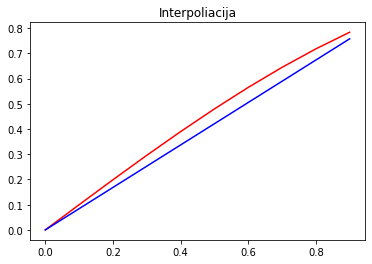

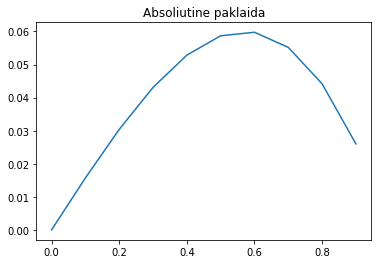

In [4]:
a, b = 0, 1 # If function divides by 0, it will not plot!
int_y = list(interpolate2p(i,a,b,f) for i in x)

plot_int(x, y, int_y)
plot_err(x, error_f(y, int_y))

### INT3. Funkcijos globalusis interpoliavimas antrosios eilės daugianariu
Interpoliuojama funkcija yra kvadratinė
: $N_2(x) = a_0 + a_1x + a_2x^2$

Gaunamas tinklas
: $x_0 = a$, $a < x_1 < b$, $x_2 = b$

Koeficientai $a_0, a_1, a_2$ tenkina sistemą
: $\begin{cases} a_0 + a_1x_0 + a_2x_0^2 = f(x_0) \\ a_0 + a_1x_1 + a_2x_1^2 = f(x_1) \\ a_0 + a_1x_2 + a_2x_2^2 = f(x_2) \end{cases}$

Šios sistemos determinantas, tai Vandermondo determinantas, todėl
: $V = \det\left(\begin{array}{ccc} 1 & x_0 & x_0^2 \\ 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \end{array}\right) = (x_1 - x_0)(x_2 - x_1)(x_2 - x_0) \neq 0$

Jei tinklas tolyginis, t.y. $x_1 - x_0 = x_2 - x_1 = h$ - tarpai tarp taškų vienodi, tai koeficientus $a_0, a_1, a_2$ randame:

$a_0 = f_0 + \frac{x_0(f_0 - f_1)}{h} + \frac{x_0x_1(f_0 - 2f_1 + f_2)}{2h^2}$

$a_1 = -\frac{f_0 - f_1}{h} - \frac{(x_0+x_1)(f_0 - 2f_1 + f_2)}{2h^2}$

$a_2 = \frac{f_0 - 2f_1 + f_2}{2h^2}$

Jei tinklas nėra tolyginis, tai tuos pačius koeficientus atitinkamai randame:

$a_0 = \frac{x_1x_2}{(x_0-x_1)(x_0-x_2)}f_0 - \frac{x_0x_2}{(x_0-x_1)(x_1-x_2)}f_1 + \frac{x_0x_1}{(x_0-x_2)(x_1-x_2)}f_2$

$a_1 = -\frac{x_1+x_2}{(x_0-x_1)(x_0-x_2)}f_0 + \frac{x_0+x_2}{(x_0-x_1)(x_1-x_2)}f_1 + \frac{x_0+x_1}{(x_0-x_2)(x_1-x_2)}f_2$

$a_2 = \frac{1}{(x_0-x_1)(x_0-x_2)}f_0 - \frac{1}{(x_0-x_1)(x_1-x_2)}f_1 + \frac{1}{(x_0-x_2)(x_1-x_2)}f_2$

, kai $f_0 = f(x_0)$, $f_1 = f(x_1)$ ir $f_2 = f(x_2)$.

In [5]:
f = lambda t: np.sin(t) # function
x_0, x_1, x_2 = 0, np.pi/2, np.pi # three points for interpolation

def vandermond(x0, x1, x2):
    return (x1-x0)*(x2-x1)*(x2-x0)

def cramer(x0, x1, x2, f):
    a_0 = np.array([[f(x0), x0, x0**2], [f(x1), x1, x1**2], [f(x2), x2, x2**2]])
    a_1 = np.array([[1, f(x0), x0**2], [1, f(x1), x1**2], [1, f(x2), x2**2]])
    a_2 = np.array([[1, x0, f(x0)], [1, x1, f(x1)], [1, x2, f(x2)]])
    
    return np.linalg.det(a_0)*(1/V), \
           np.linalg.det(a_1)*(1/V), \
           np.linalg.det(a_2)*(1/V)

def interpolate3p(a_0, a_1, a_2, x):
    return a_0 + a_1*x + a_2*(x**2)

V = vandermond(x_0,x_1,x_2)
a0, a1, a2 = cramer(x_0, x_1, x_2, f)

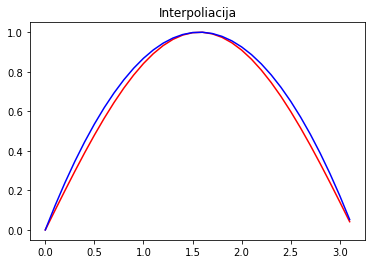

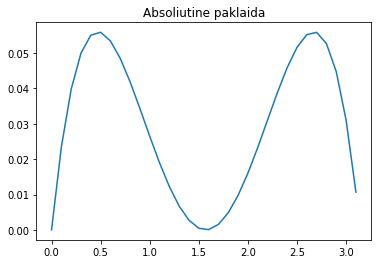

In [6]:
x = np.arange(0,3.2,0.1) # axis limits
y = f(x)
int_y = [interpolate3p(a0, a1, a2, i) for i in x]

err = error_f(y, int_y)
plot_int(x, y, int_y)
plot_err(x, err)

### INT4. Funkcijos interpoliavimas n - tosios eilės daugianariu
Funkcija interpoliuojama n-tosios eilės daugianariu
: $N(x) = a_0 + a_1x + a_2x^2 + ... + a_nx^n$

Gaunamas tinklas
: $x_0 = a < x_1 < ... < x_n = b$

Interpoliavimo koeficientai $ a_0, a_1, ..., a_n$ turi tenkinti sistemą:
$\begin{cases} a_0 + a_1x_0 + a_2x_0^2 + ... + a_nx_0^n= f(x_0) \\ a_0 + a_1x_1 + a_2x_1^2 + ... + a_nx_1^n = f(x_1) \\ ... \\ a_0 + a_1x_n + a_2x_n^2 + ... + a_nx_n^n = f(x_n) \end{cases}$

Koeficientai gaunami išsprendus šią sistemą

In [128]:
f = lambda t: np.sin(5*t)/t # interpolation function
degree = 10 # interpolation degree
x0, xn = 1, 6 # interpolation interval

h = (abs(x0-xn))/(degree-1) # the gap between each interpolation point (in this case all gaps are the same)
x_space = np.arange(x0,xn,0.1) # axis limits
x = np.arange(x0, xn+h, h)
power = np.arange(0,degree)

def generate_matrix_X(X, F, P):
    matrix_x = [np.vstack(np.power(i, P)) for i in X]
    return np.hstack(matrix_x)

def interpolateNp(A, I, P):
    return sum(A*np.power(I,P))

matrixX = generate_matrix_X(x, f, power).transpose()
a = np.linalg.solve(matrixX, f(x))

int_y = [interpolateNp(a, i, power) for i in x_space]

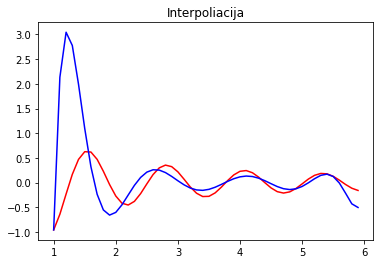

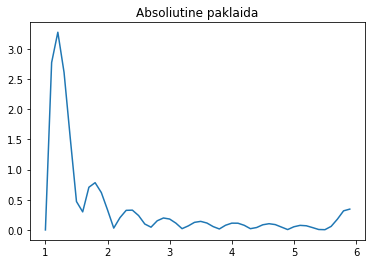

In [75]:
plot_int(x_space, f(x_space), int_y)
plot_err(x_space, error_f(f(x_space), int_y))

### INT5. Lagranžo interpoliacinis daugianaris
Apsibrėžiame funkciją:

$P_i(n,x) = \prod_{k=0}^n \frac{(x-x_k)}{(x_i-x_k)}$

Funkcija interpoliuojama n-tosios eilės daugianariu:

$ N_n(x) = \sum_{i=0}^n f(x_i)P_i(n,x) $

In [174]:
from math import prod
f = lambda t: np.log(t)/(3*(t**3)) # interpolation function
degree = 7 # interpolation degree
x0, xn = 1, 7 # interpolation interval

h = (abs(x0-xn))/(degree-1) # the gap between each interpolation point (in this case all gaps are the same)
x_space = np.arange(x0,xn,0.1) # axis limits
x = np.arange(x0, xn+h, h)

def func_P(x, xi, X):
    return prod([(x-xk)/(xi-xk) if xk != xi else 1 for xk in X])
    
def interpolateLg(x, X):
    return sum([f(xi)*func_P(x,xi,X) for xi in X])

int_y = [interpolateLg(i, x) for i in x_space]

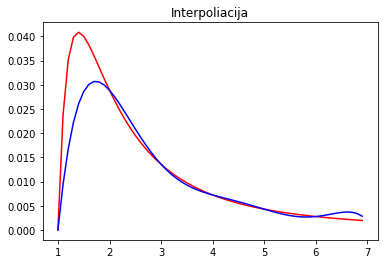

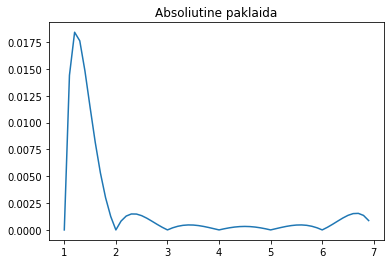

In [175]:
plot_int(x_space, f(x_space), int_y)
plot_err(x_space, error_f(f(x_space), int_y))